In [56]:
#importing libraries
import numpy
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [57]:
#loading dataset
data=pd.read_csv("C:\\Users\\Hp\\Desktop\\sales_data.csv")
data.head(10)

,outlet_id,scan_code,period_code,sales,count_bills,count_qty,updated_ts,id,hier_bills,hier_sales
0,100120,9.550658e+07,05-05-2021,330,2,2,07-07-2021 02:22,251444554,26,8295
1,100131,2.084700e+08,08-05-2021,10,1,2,07-07-2021 02:22,251444712,7,985
2,100131,4.902430e+12,07-05-2021,75,1,1,07-07-2021 02:22,251444751,2,145
3,100131,8.901020e+12,01-05-2021,120,1,3,07-07-2021 02:22,251444897,1,120
4,100131,8.901030e+12,01-05-2021,68,1,1,07-07-2021 02:22,251444926,10,2104
5,100131,8.901030e+12,01-05-2021,44,1,1,07-07-2021 02:22,251444928,10,2104
6,100131,8.901030e+12,03-05-2021,30,1,2,07-07-2021 02:22,251444951,6,391
7,100131,8.901030e+12,01-05-2021,64,1,2,07-07-2021 02:22,251444956,10,2104
8,100131,8.901030e+12,01-05-2021,274,2,3,07-07-2021 02:22,251445018,10,2104
9,100131,8.901040e+12,05-05-2021,110,1,1,07-07-2021 02:22,251445163,2,330


In [58]:
data.describe()

,outlet_id,scan_code,sales,count_bills,count_qty,id
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,100102.030000,8.419444e+12,171.300000,1.638000,5.337000,2.404601e+08
std,55.277669,1.456280e+12,353.735711,1.459138,66.327587,1.965911e+07
min,100039.000000,4.023510e+07,5.000000,1.000000,1.000000,1.993371e+08
25%,100039.000000,8.901030e+12,40.000000,1.000000,1.000000,2.268326e+08
50%,100112.000000,8.901060e+12,80.000000,1.000000,2.000000,2.514372e+08
75%,100150.000000,8.901760e+12,165.000000,2.000000,3.000000,2.514532e+08
max,100182.000000,8.992950e+12,4614.000000,23.000000,2094.000000,2.514695e+08


In [59]:
data.dtypes

outlet_id        int64
scan_code      float64
period_code     object
sales            int64
count_bills      int64
count_qty        int64
updated_ts      object
id               int64
hier_bills      object
hier_sales      object
dtype: object

In [60]:
data['period_code']=pd.to_datetime(data['period_code'])
data.dtypes

outlet_id               int64
scan_code             float64
period_code    datetime64[ns]
sales                   int64
count_bills             int64
count_qty               int64
updated_ts             object
id                      int64
hier_bills             object
hier_sales             object
dtype: object

In [77]:
series=data[['period_code','sales']]
series.head(10)

,period_code,sales
0,2021-05-05,330
1,2021-08-05,10
2,2021-07-05,75
3,2021-01-05,120
4,2021-01-05,68
5,2021-01-05,44
6,2021-03-05,30
7,2021-01-05,64
8,2021-01-05,274
9,2021-05-05,110


In [62]:
#Splitting dataset:
n=int(len(df)*0.8)
train=df.sales[:n]
test=df.sales[n:]

In [63]:
print(len(train))
print(len(test))

800
200


In [64]:
from statsmodels.tsa.stattools import adfuller
test_results=adfuller(df['sales'])

In [65]:
#statistical test:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF test statistics','p-value','lags used','no. of observations']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))

In [66]:
adfuller_test(df['sales'])

ADF test statistics : -9.536267223744861
p-value : 2.8033820250228806e-16
lags used : 5
no. of observations : 994


In [67]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [68]:
stepwise_fit=auto_arima(df["sales"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14449.321, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14848.943, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14750.194, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14525.514, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14846.943, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14443.995, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14443.989, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14443.524, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14441.189, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14442.723, Time=1.21 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=14442.856, Time=1.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=14444.521, Time=0.60 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14442.140, Time=1.26 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=14439.205, Time=0.60 sec
 ARIMA(0,1,3)(0,0,0

In [69]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -7212.194
Date:                Wed, 01 Sep 2021   AIC                          14438.387
Time:                        11:21:32   BIC                          14472.734
Sample:                             0   HQIC                         14451.442
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7129      0.048    -35.473      0.000      -1.808      -1.618
ar.L2         -0.9173      0.047    -19.559      0.000      -1.009      -0.825
ma.L1          1.0578      0.045     23.264      0.000       0.969       1.147
ma.L2         -0.5083      0.022    -23.290      0.000      -0.551      -0.466
ma.L3         -1.1487      0.038    -30.165      0.000      -1.223      -1.074
ma.L4         -0.2774      0.024    -11.595      0.000      -0.324      -0.231
sigma2      1.122e+05   1549.421     72.434      0.000    1.09e+05    1.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             63983.70
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.79   Skew:                             4.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [71]:
#model building
model=ARIMA(train,order=(2,1,4))
result=model.fit(disp=0)

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  799
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -5807.512
Method:                       css-mle   S.D. of innovations            346.419
Date:                Wed, 01 Sep 2021   AIC                          11631.024
Time:                        11:21:33   BIC                          11668.490
Sample:                             1   HQIC                         11645.418
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3491      0.295      1.183      0.237      -0.229       0.928
ar.L1.D.sales    -1.5196      0.228     -6.656      0.000      -1.967      -1.072
ar.L2.D.sales    -0.7362      0.172     -4.281      0.000      -1.073      -0.399
ma.L1.D.sales     0.8822      0.233      3.779      0.000       0.425       1.340
ma.L2.D.sales    -0.5598      0.066     -8.537      0.000      -0.688      -0.431
ma.L3.D.sales    -1.0104      0.177     -5.699      0.000      -1.358      -0.663
ma.L4.D.sales    -0.2397      0.089     -2.682      0.007      -0.415      -0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0321           -0.5414j            1.1655           -0.4231
AR.2           -1.0321           +0.5414j            1.1655            0.4231
MA.1            1.0168           -0.0000j            1.0168           -0.0000
MA.2           -0.9765           -0.5457j            1.1186           -0.4189
MA.3           -0.9765           +0.5457j            1.1186            0.4189
MA.4           -3.2792           -0.0000j            3.2792           -0.5000
-----------------------------------------------------------------------------
"""

In [73]:
step=100 #prediction for next 100 steps
fc,se, conf=result.forecast(step)

In [74]:
#forecast
fc

array([249.3157471 , 377.23682611, 368.05772131, 355.1129691 ,
       382.67868456, 351.45495378, 379.747063  , 360.8763026 ,
       369.86146969, 371.23632609, 363.66887735, 375.29324036,
       364.3360406 , 373.56603227, 368.74294298, 370.41395734,
       372.56197737, 369.20421056, 373.86213864, 370.39234035,
       373.37274325, 372.5346708 , 372.75075486, 374.17602138,
       372.98769383, 374.88092127, 374.01537373, 375.07357991,
       375.23934347, 375.34505473, 376.19903332, 375.96011835,
       376.83114954, 376.8200316 , 377.33233732, 377.69865383,
       377.90148247, 378.46023131, 378.59846487, 379.11370846,
       379.36560908, 379.74014685, 380.12219016, 380.40254323,
       380.83190423, 381.10968901, 381.50811801, 381.83479934,
       382.18169464, 382.55069184, 382.87122056, 383.24913312,
       383.57552449, 383.93796446, 384.28355269, 384.62821097,
       384.98668856, 385.32485027, 385.68371132, 386.02607303,
       386.37826926, 386.72766715, 387.07407744, 387.42

In [75]:
fc=pd.Series(fc, index=test[:step].index)
lower=pd.Series(conf[:, 0],index=test[:step].index)
upper=pd.Series(conf[:, 1],index=test[:step].index)

[]

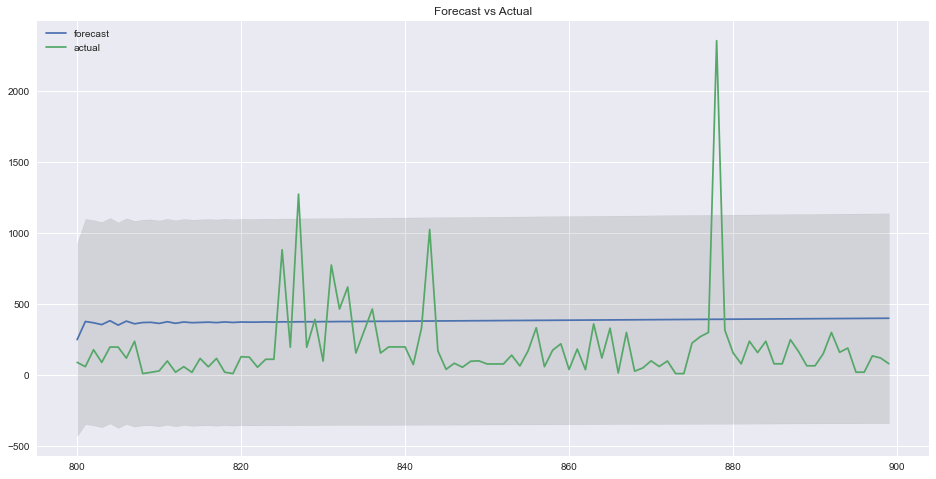

In [76]:
#Visual Results
plt.figure(figsize=(16,8))
plt.plot(fc, label='forecast')
plt.plot(test[:step],label='actual')
plt.fill_between(lower.index,lower,upper,color='k',alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")